In [48]:
# set environment variables
import sys
import os
path = "/Users/israfelsalazar/Documents/deep-genomic.nosync/deep-genomic/"
sys.path.append(path)
os.environ["WORKDIR"] = path
from tqdm import tqdm

# common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

# torch
from torch.utils.data import DataLoader

# local imports
from modeling.generator import Generator
from modeling.models import StudentTeacherModel
from datasets.genomic_environmental_dataset import load_data, load_conditions
from train.train_generative import set_seed

%load_ext autoreload
%autoreload 

data_dir = "../data/sim1"


set_seed(42)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
results_dir = "../experiment_outputs/norm_prior/"
model = StudentTeacherModel.from_pretrained(results_dir)

2022-06-23 12:15:35,502 - modeling.genomic_model - INFO - Loading model from {model_path}
2022-06-23 12:15:35,527 - modeling.genomic_model - INFO - Resolved config from ../experiment_outputs/norm_prior/config.json
2022-06-23 12:15:35,551 - modeling.genomic_model - INFO - Loaded weights from ../experiment_outputs/norm_prior/pytorch_model.bin


In [50]:
generator = Generator(model, ["var_current.csv"], data_dir)

In [51]:
c_current = torch.tensor(load_conditions(["var_current.csv"],data_dir, True),dtype=torch.float)
c_future = torch.tensor(load_conditions(["var_future.csv"],data_dir, True),dtype=torch.float)

In [52]:
mu, logvar = model.prior(c_current)
pmu, plogvar = model.prior(c_future)

In [53]:
from datasets.utils import filter_by
mu_reconstructed = filter_by(mu.detach().numpy(), generator.population)
mu_generated = filter_by(pmu.detach().numpy(), generator.population)

In [58]:
r2, genomic_offset, fitness_offset, predicted_fitness = generator.compute_r2(mu_reconstructed, mu_generated)

2022-06-23 12:16:12,844 - modeling.generator - INFO - R2 cvae: 0.14103439305773569
2022-06-23 12:16:12,844 - modeling.generator - INFO - R2 cvae: 0.14103439305773569
2022-06-23 12:16:12,844 - modeling.generator - INFO - R2 cvae: 0.14103439305773569
2022-06-23 12:16:12,844 - modeling.generator - INFO - R2 cvae: 0.14103439305773569


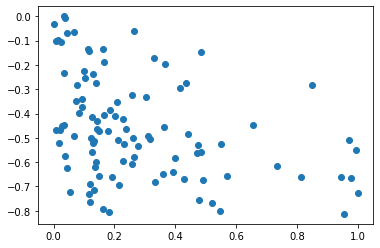

In [55]:
plt.scatter(genomic_offset, fitness_offset)